# Exploring the WCWH Ambassador Family Beacon IAQ Data
(See [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

In [105]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Package Import

In [106]:
import sys
sys.path.append('../')

from src.visualization import visualize
from src.data import wcwh
from src.exploration import beacon_summary

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import datetime, timedelta

# Table of Contents
1. [Notes on Analysis and References](#refs)
2. [Data Notes and Import](#import)
3. [Operation and Available Data](#operation)
4. [Aggregated Summary](#aggregated)
5. [Participant Based](#pt-based)

---

<a id="refs"></a>

# Notes on Analysis and References
The analyses in this notebook are primarily surface-level, but are described briefly below.

## References
Some of the references used for analysis as well as for programming.

### Programming
1. [How to Replace Negative Numbers with 0](https://stackoverflow.com/questions/27759084/how-to-replace-negative-numbers-in-pandas-data-frame-by-zero/27759140): For corrected beacon data that corrected values to negatives.
2. [Add Missing Dates to DataFrame Index](https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe): To fill in missing timestamps when the beacon would have gone offline so we can accurately understand reliability.

---

<a id="import"></a>

# Data Notes and Import
Some notes on the data we use and then importing the actual data to look at.

## WCWH Ambassador Families
The ambassador families represent those that signed on for a beta test of all our protocol including the BEVO Beacon. The following devices were included in the rollout:

```python
beacon_list = [1,16,30,36]
```

## TEST IMPORT

<div class="alert alert-block alert-info">
 
Testing the functionality of the beacon data import class for the WCWH pilot family era.
    
</div>

In [111]:
test_import = wcwh.wcwh(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data",verbose=2,start_time=datetime(2022,1,1),end_time=datetime(2022,1,24))
test_import.process_beacon(extreme="zscore",retain_negative=True,columns_to_leave_raw=["temperature_c"])

	Processing beacon data...

		Reading for beacon:
		01
			Correcting pm10_mass
			Correcting co
			Correcting pm1_mass
			Correcting tvoc
			Correcting pm2p5_mass
			Correcting co2
			Retaining negative values
			Retaining NaN values
		02
			No data available for Beacon 2 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		03
			No data available for Beacon 3 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		04
			No data available for Beacon 4 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		05
			No data available for Beacon 5 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		06
			No data available for Beacon 6 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		07
			No data available for Beacon 7 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		08
			No data available for Beacon 8 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		09
			No data available for Beacon 9 between 2022-01-01 00:00:00 - 2022-01-24 00:00:00
		10
			No data available for Beacon 10 between 2022-0

True

In [112]:
test_import.beacon_data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm1_number,pm10_number,pm2p5_number,tvoc,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,
2022-01-01 00:00:00,11.661409,1263.794555,2.04,-31.4,0.873541,2.202672,33.302178,52.450571,61.236338,59.706638,1.164888,22.5,48.5,1
2022-01-01 00:01:00,11.851490,1534.013224,2.04,-31.4,0.495397,0.443060,3.427843,28.680209,30.005432,29.787674,8.736656,22.5,48.5,1
2022-01-01 00:02:00,11.646280,1488.203104,2.04,-31.4,0.479096,0.731879,7.145036,25.903811,28.902724,28.385579,13.396206,22.5,48.5,1
2022-01-01 00:03:00,11.546481,1493.921690,2.04,-28.4,0.687357,1.351086,18.796054,40.675984,45.869332,44.971157,2.523923,22.5,48.5,1
2022-01-01 00:04:00,11.539161,1505.806971,2.04,-27.2,0.591876,1.686079,21.948349,30.930529,38.503994,37.176445,13.784502,22.5,48.5,1


<div class="alert alert-block alert-success">
 
Looks like, at least at this time, that the `wcwh` class is able to successfully import and clean the beacon data from the devices out in the field.
    
This process needs to be incorporated in the `make_dataset.py` script.
    
</div>

## Complete Beacon
The complete set of beacon data represented by the object `beacon`

In [113]:
beacon = beacon_summary.Summarize(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data/")
beacon.data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm1_number,pm10_number,pm2p5_number,tvoc,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,
2022-01-01 00:00:00,11.661409,1263.794555,2.04,-31.4,0.873541,2.202672,33.302178,52.450571,61.236338,59.706638,1.164888,22.5,48.5,1
2022-01-01 00:01:00,11.851490,1534.013224,2.04,-31.4,0.495397,0.443060,3.427843,28.680209,30.005432,29.787674,8.736656,22.5,48.5,1
2022-01-01 00:02:00,11.646280,1488.203104,2.04,-31.4,0.479096,0.731879,7.145036,25.903811,28.902724,28.385579,13.396206,22.5,48.5,1
2022-01-01 00:03:00,11.546481,1493.921690,2.04,-28.4,0.687357,1.351086,18.796054,40.675984,45.869332,44.971157,2.523923,22.5,48.5,1
2022-01-01 00:04:00,11.539161,1505.806971,2.04,-27.2,0.591876,1.686079,21.948349,30.930529,38.503994,37.176445,13.784502,22.5,48.5,1


---

<a id="operation"></a>

# Operation/Reliability and Available Data
A look at how reliably the beacons have be monitoring the space and what data are available.

## Sensor Operation
Operation break-down by sensor

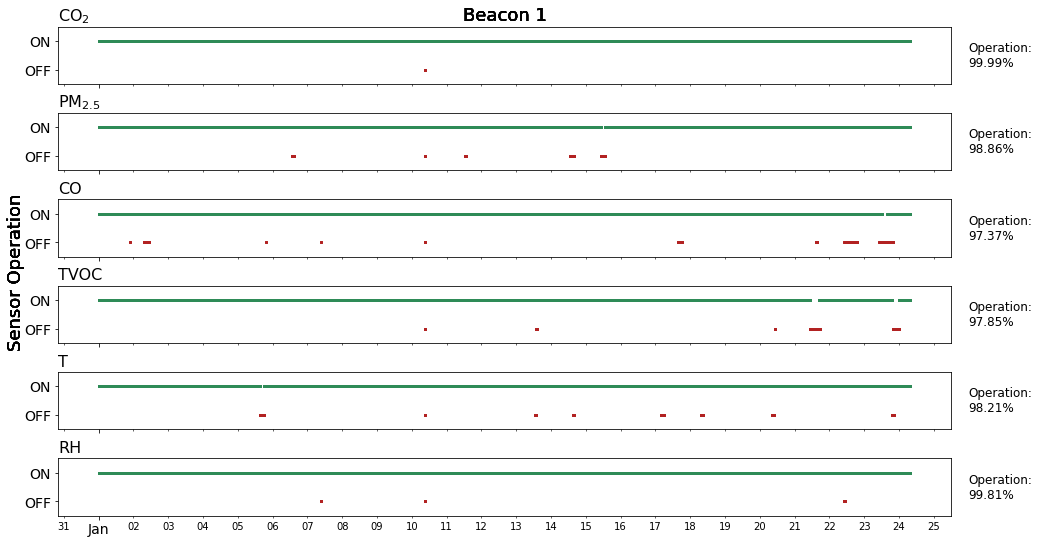

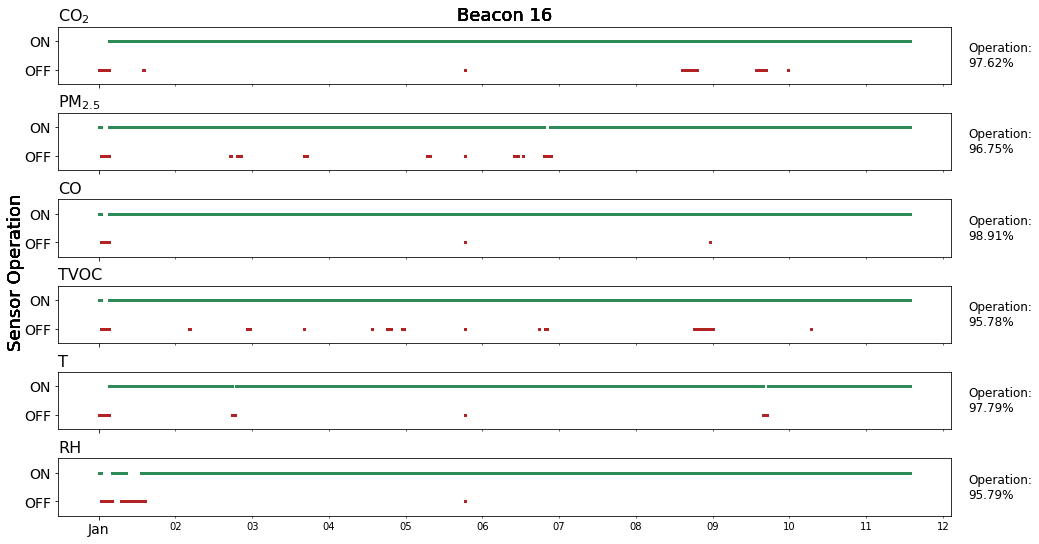

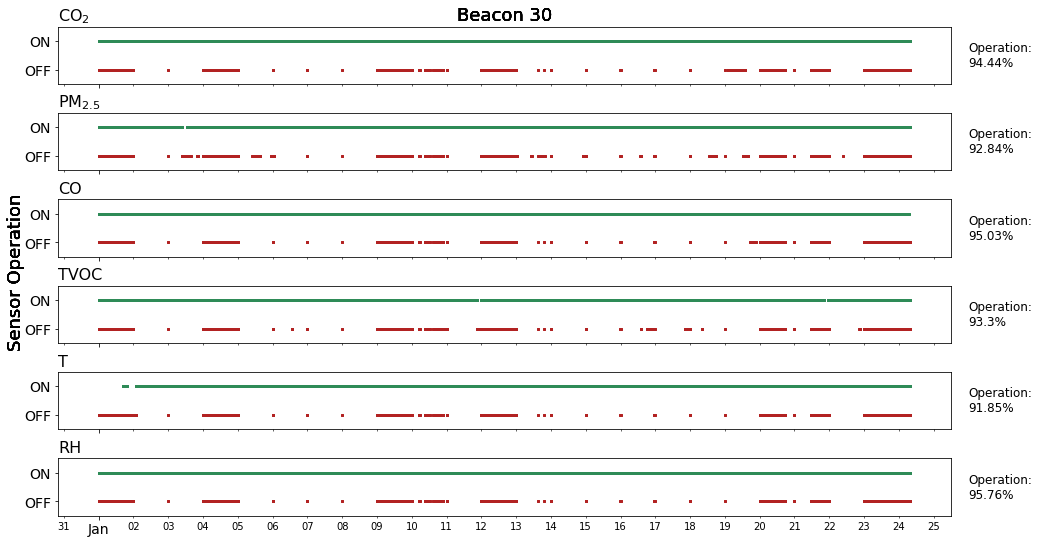

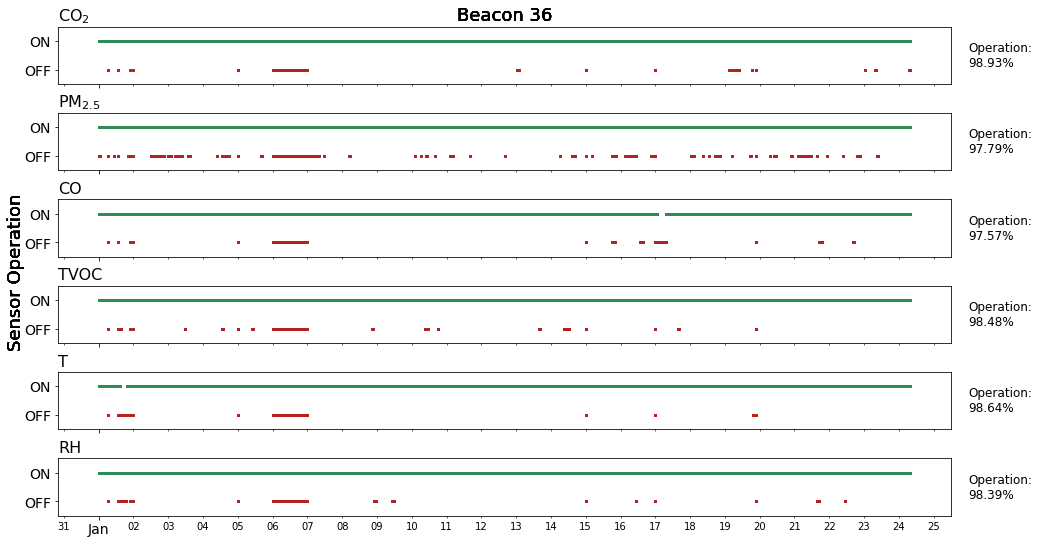

In [69]:
beacon.plot_sensor_operation()

<div class="alert alert-block alert-warning">
 
Beacon 30 seems to have periods where data are missing at every other timestamp and merits a closer look.
    
</div>

### Beacon 30
These are some of the periods where Beacon 30 exhibits extensive missing data:
* 01/01/22 - 01/02/22
* 01/09/22 - 01/11/22

These periods are also consistent across all sensors. However, the PM sensors seems to go offline a bit more often during these periods:
* 01/05/22 - 01/06/22
* 01/13/22 12:00 - 01/14/22

<div class="alert alert-block alert-warning">
 
On closer inspection, it seems there is a small timing issue when logging the measurements which is more pronounced on Beacon 30 compared to the others. It seems the measurements are not made on every minute exactly. Therefore, there are instances when the a measurement appears within the same minute i.e. 8:00 and 8:57. Then new data are logged at every minute from that _last_ timestamp for a certain amount of time before the software corrects itself. However, when it corrects, the next minute is skipped - for example:
    
* 4:57
* 5:57
* 6:57
* 8:00
    
This causes us to miss minute 7:00 when we do the resample since 6:57 -> 6:00 and 8:00 - > 8:00. The solution would be to round each timestamp to the nearest minute and then `reindex` but rounding datetime instances is not as straight-forward as it should be...
    
</div>

#### Temperature

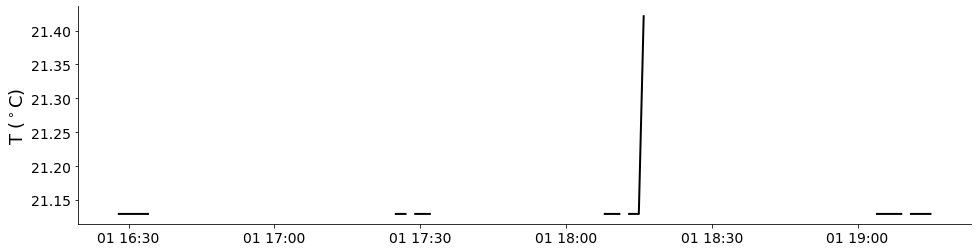

In [19]:
beacon.plot_beacon_ts(30,"temperature_c",datetime(2022,1,1),datetime(2022,1,2))

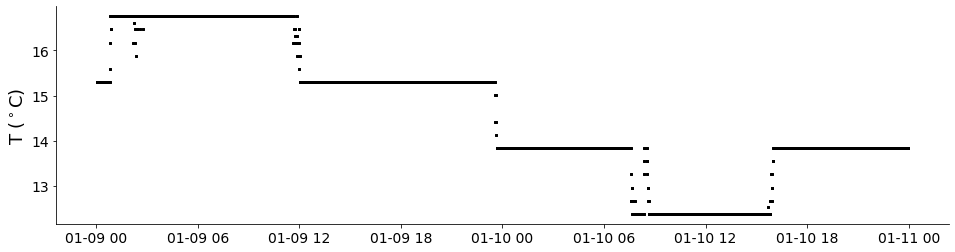

In [21]:
beacon.plot_beacon_ts(30,"temperature_c",datetime(2022,1,9),datetime(2022,1,11),scatter=True)

#### PM

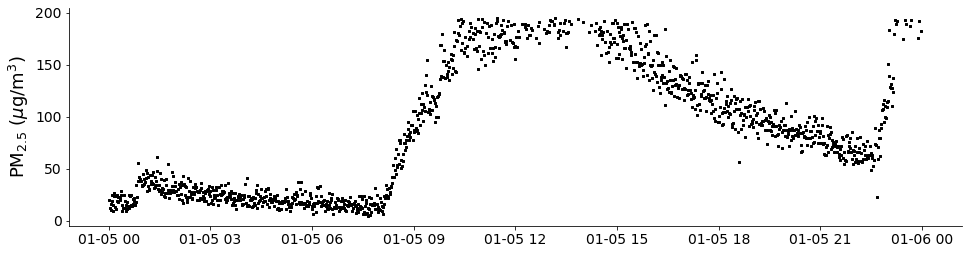

In [25]:
beacon.plot_beacon_ts(30,"pm2p5_mass",datetime(2022,1,5),datetime(2022,1,6),scatter=True)

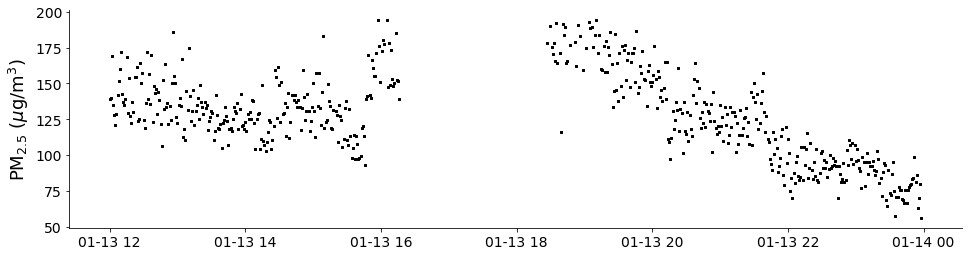

In [26]:
beacon.plot_beacon_ts(30,"pm2p5_mass",datetime(2022,1,13,12),datetime(2022,1,14),scatter=True)

---

<a id="aggregated"></a>

# Aggregated Summary
Starting with a summary of all the available data

## Statistics

In [8]:
beacon.get_summary_stats()

\begin{tabular}{lrrrrrrr}
\toprule
{} &       n &     avg &     med &    min &     25\% &     75\% &     95\% \\
\midrule
co2           &  113421 &  1515.7 &  1480.8 &  429.4 &  1011.4 &  1932.3 &  2598.7 \\
pm2p5\_mass    &  111987 &    21.8 &     7.5 &    0.0 &     1.2 &    22.7 &   105.8 \\
co            &  112479 &     7.8 &     7.0 &    0.0 &     5.6 &    10.0 &    18.9 \\
tvoc          &  111883 &   192.3 &    44.8 &    0.0 &     7.6 &   200.5 &   748.3 \\
temperature\_c &  111881 &    15.0 &    16.3 &    2.5 &     8.3 &    19.7 &    23.7 \\
rh            &  113343 &    50.7 &    48.0 &   24.0 &    43.0 &    59.0 &    70.0 \\
\bottomrule
\end{tabular}



,n,avg,med,min,25%,75%,95%
co2,113421,1515.7,1480.8,429.4,1011.4,1932.3,2598.7
pm2p5_mass,111987,21.8,7.5,0.0,1.2,22.7,105.8
co,112479,7.8,7.0,0.0,5.6,10.0,18.9
tvoc,111883,192.3,44.8,0.0,7.6,200.5,748.3
temperature_c,111881,15.0,16.3,2.5,8.3,19.7,23.7
rh,113343,50.7,48.0,24.0,43.0,59.0,70.0


## Distributions

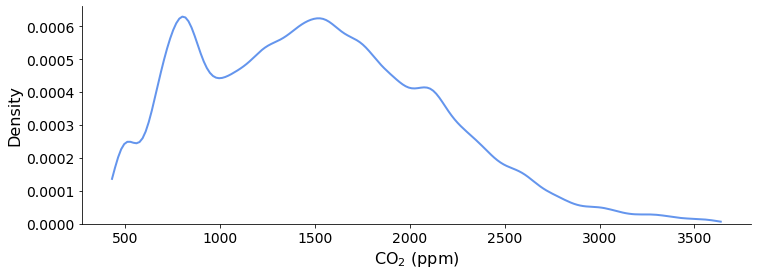

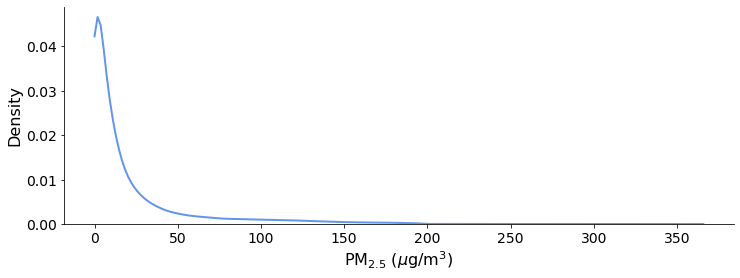

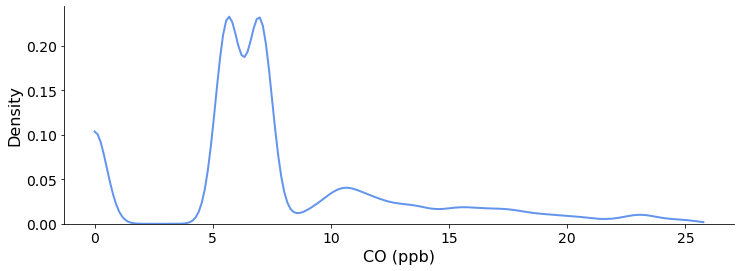

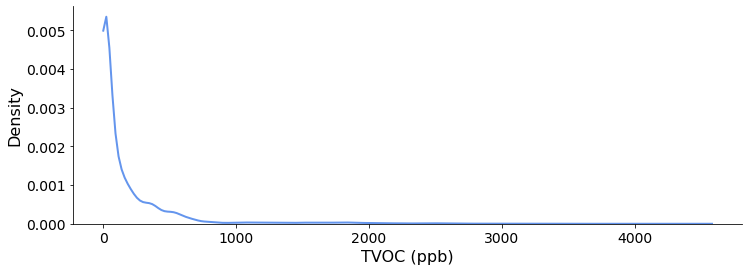

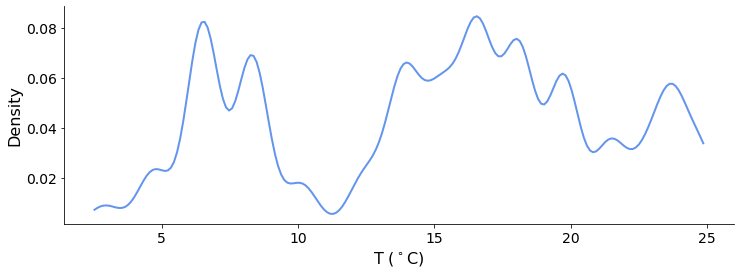

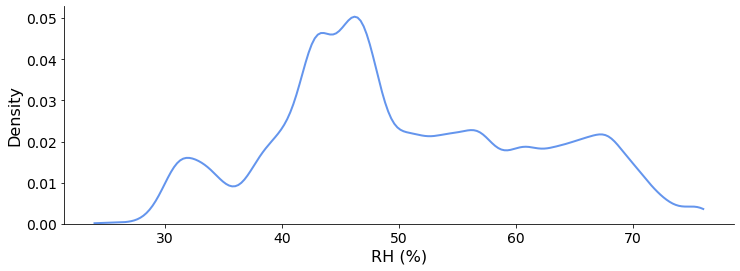

In [9]:
beacon.plot_distributions()

For the most part, the beacons appear to be behaving normally with measurements within normal ranges with the occasional extreme measurements consistent with activity like cooking and cleaning.

<div class="alert alert-block alert-danger">
 
The temperature measurements are very low and cannot be accurate. The likely cause is the correction file that we are using so I should first re-examine if I am using the right file and then if so, look at the raw data prior to correcting. 
    
</div>

### Temperature
First task is to identify if there is a particular beacon that is causing the issue

Beacon 1


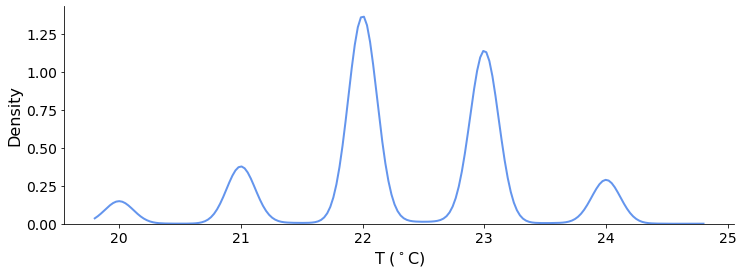

Beacon 16


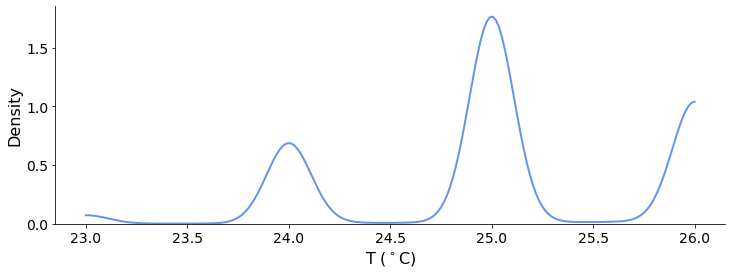

Beacon 30


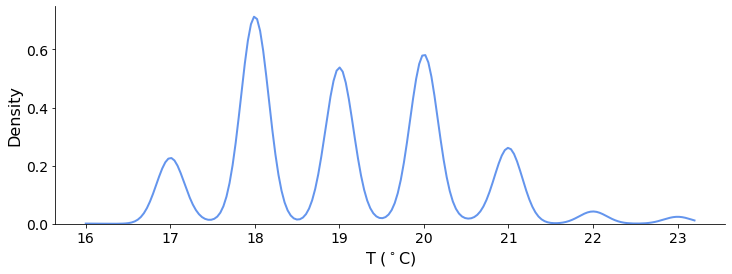

Beacon 36


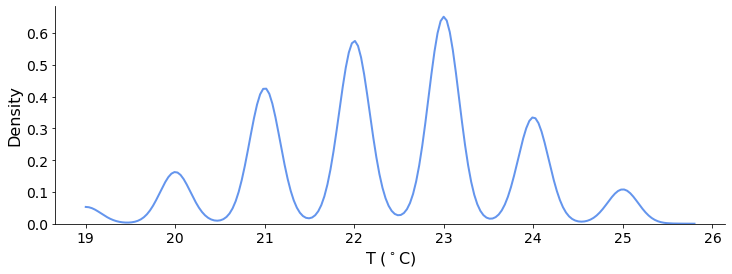

In [70]:
for bb in beacon.data["beacon"].unique():
    print(f"Beacon {bb}")
    bb_df = beacon.get_beacon(bb)
    beacon.plot_distributions(data=bb_df,params=["temperature_c"])

<div class="alert alert-block alert-warning">
 
Some of the beacons are reading _very_ low which is a consequence of their calibration. Beacon 1 has a $b = -33$ and has the worst performance while Beacons 30 and 36 have $b \approx -15$. Beacon 16 is the most reasonable at $b = -5$ and therefore has the most likely measurements. 
    
A more thorough/proper calibration should be conducted so therefore we should use the raw values for now.
    
</div>

<div class="alert alert-block alert-success">
 
Using the raw temperature values highlight more reasonable measurements. Perhaps the fact that we are measuring during the heating season means the calibration models are not appropriate.
    
</div>

---

<a id="pt-based"></a>

# Participant-Based Summary

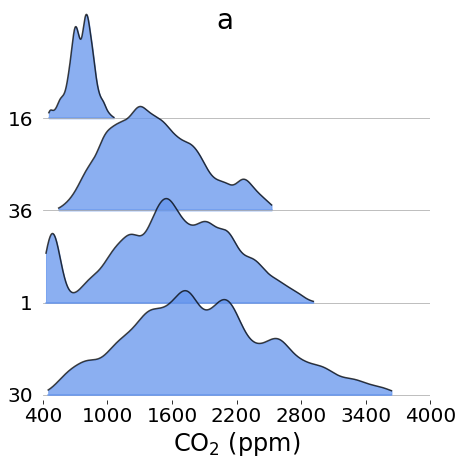

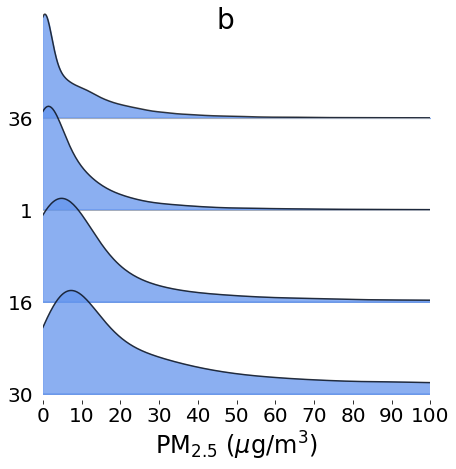

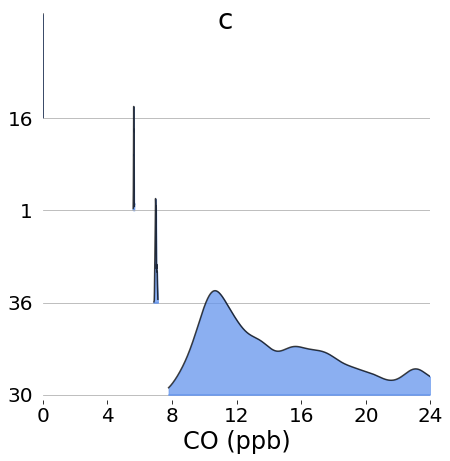

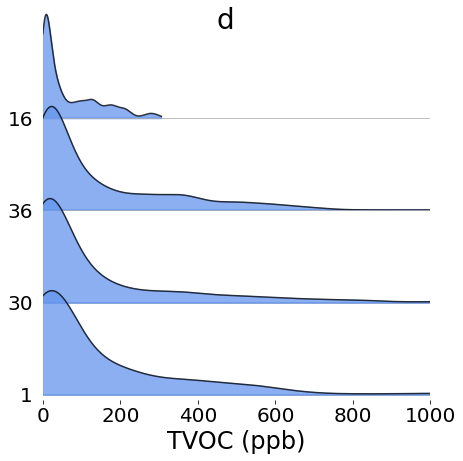

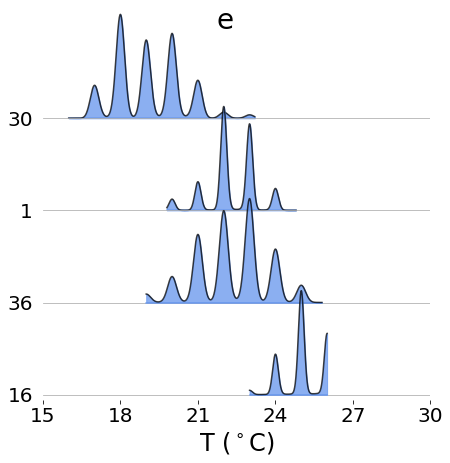

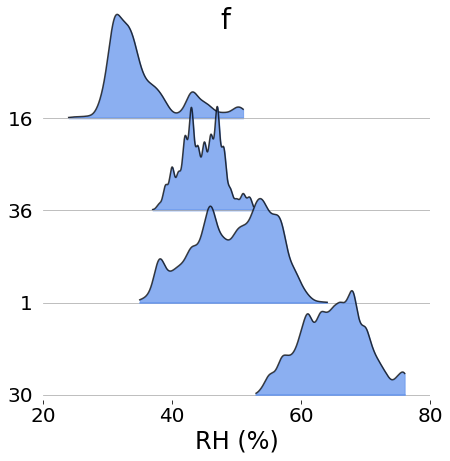

In [77]:
beacon.plot_beacon_joyplots_by_stat(params=["co2","pm2p5_mass","co","tvoc","temperature_c","rh"],
        limits=[[400,4000],[0,100],[0,24],[0,1000],[15,30],[20,80]],
        ticks=[range(400,4200,600),range(0,110,10),range(0,28,4),range(0,1200,200),range(15,33,3),range(20,100,20)])

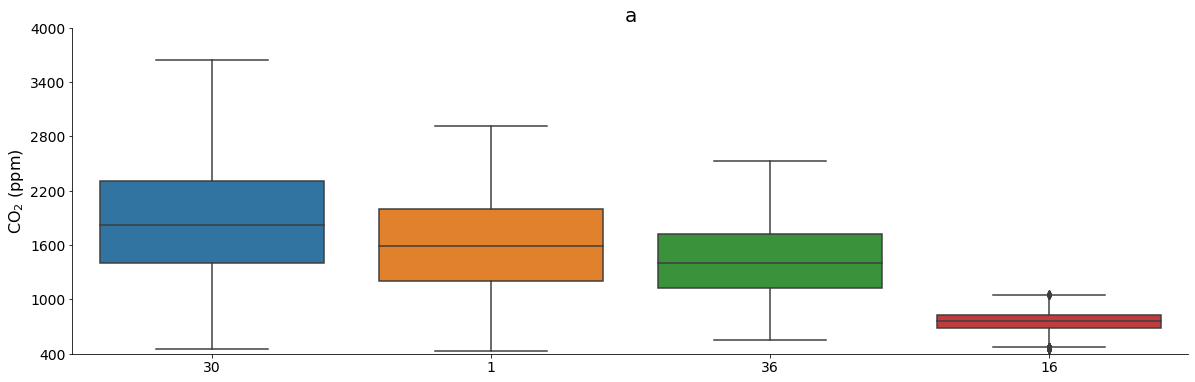

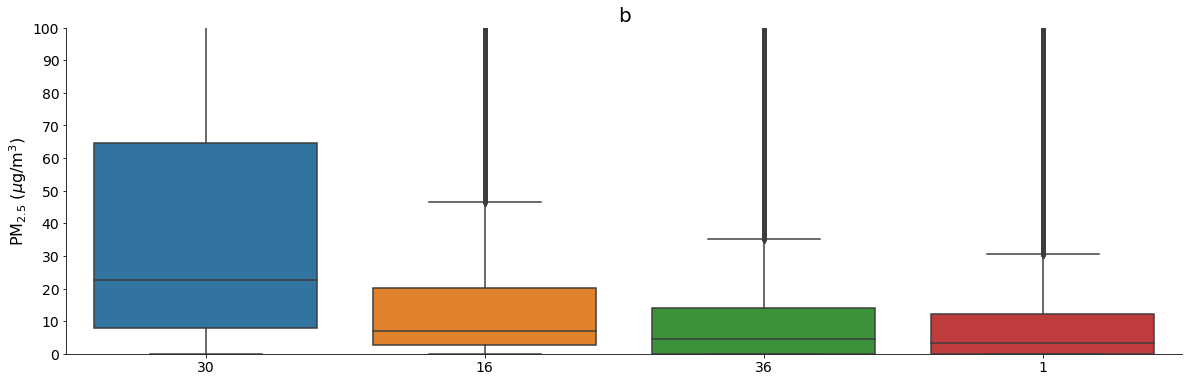

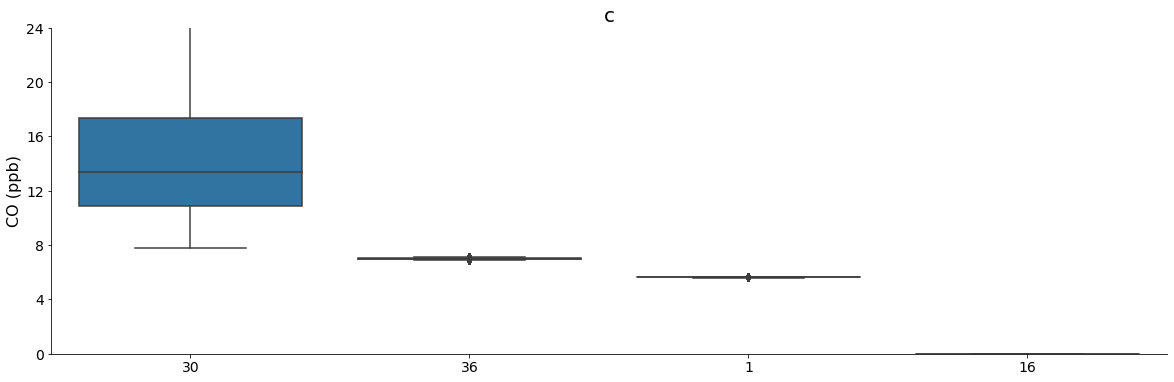

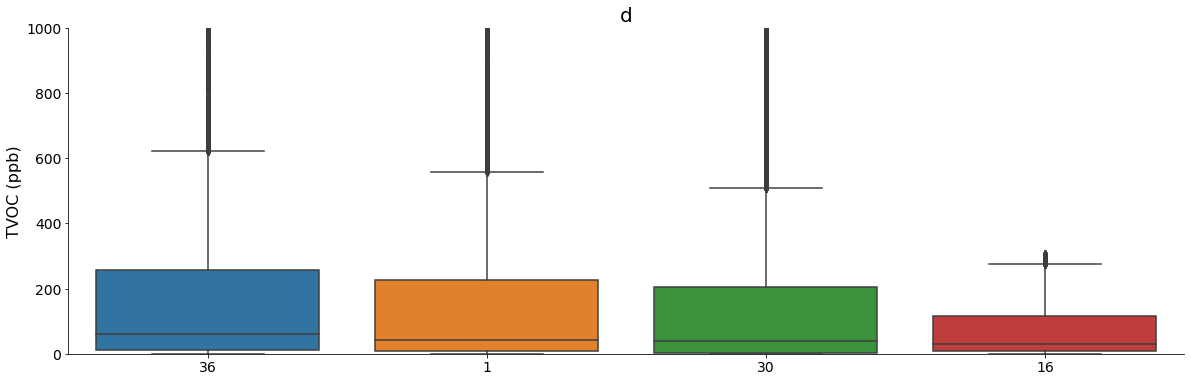

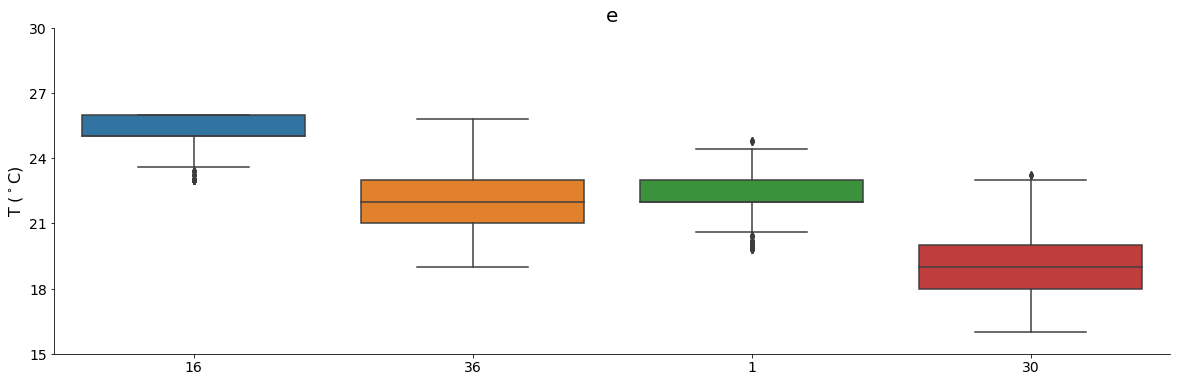

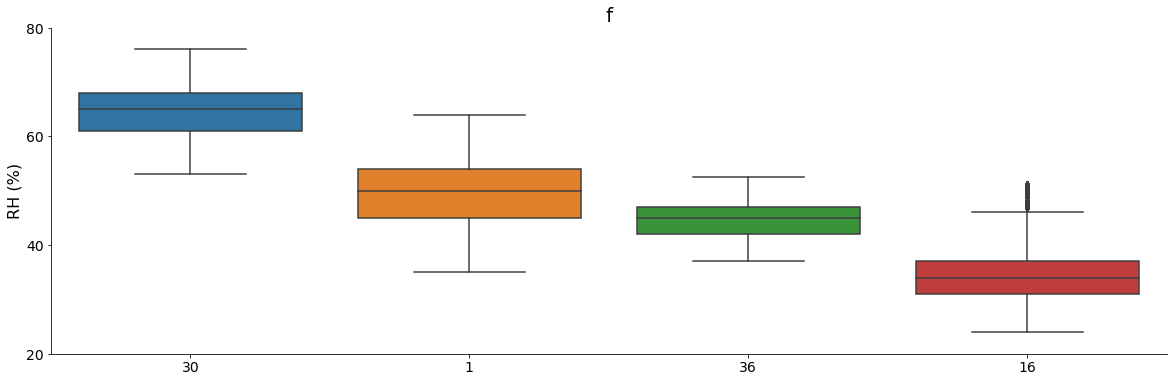

In [78]:
beacon.plot_beacon_boxplots_by_stat(params=["co2","pm2p5_mass","co","tvoc","temperature_c","rh"],
        limits=[[400,4000],[0,100],[0,24],[0,1000],[15,30],[20,80]],
        ticks=[range(400,4200,600),range(0,110,10),range(0,28,4),range(0,1200,200),range(15,33,3),range(20,100,20)])

Beacon 1


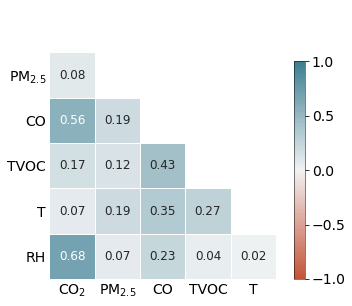

Beacon 16


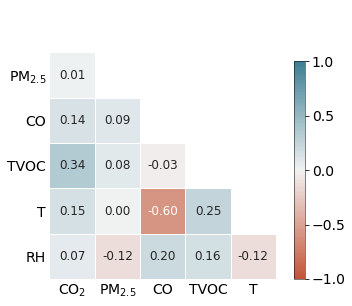

Beacon 30


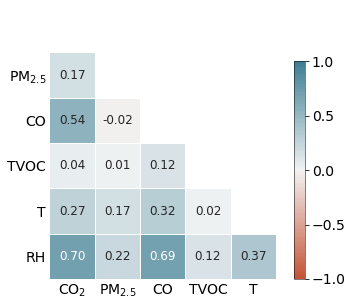

Beacon 36


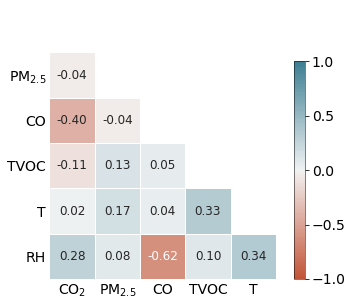

In [115]:
for bb in beacon.data["beacon"].unique():
    print(f"Beacon {bb}")
    beacon.plot_correlation_matrix(data=beacon.get_beacon(bb))

There are some correlations, most notably:
* `rh` and `co2`: This positive association appears in Beacons 1 and 30
* `co` and `co2`: This weaker, but positive association appears in Beacons 1 and 30 again
* `rh` and `co`: There are two opposite associations present in Beacons 30 (+) and 36 (-)

---